In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=d6bf7998014c5055a57827752d378693d387a8abe4e708090c1d084ab5642f44
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [2]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [3]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()

  bbox_PIL.save(iobuf, format='png')

  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);

    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


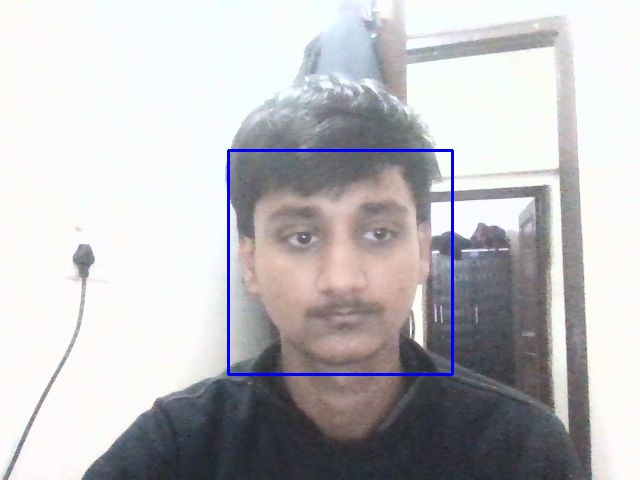

In [7]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [8]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
face_1 = face_recognition.load_image_file("photo.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

known_face_encodings = [
    face_1_encoding
]
val = input("Enter Your Name: ")
known_face_names = [val]
print("Done learning and creating profiles")

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /root/.cache/uv/sdists-v4/pypi/dlib/19.24.2/BQ7_zK6er4UhnYsQ7mw-B/dlib-19.24.2.tar.gz/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

In [ ]:
try:
  filename = take_photo('photo2.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo2.jpg
'module' object is not callable


In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
face_1 = face_recognition.load_image_file("photo.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

known_face_encodings = [
    face_1_encoding
]
val = input("Enter Your Name: ")
known_face_names = [val]
print("Done learning and creating profiles")

Enter Your Name: anish
Done learning and creating profiles


In [ ]:
try:
  filename = take_photo('image.jpg')
  print('Saved to {}'.format(filename))


  display(Image(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

(480, 640)
Saved to image.jpg
'module' object is not callable


In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
face_2 = face_recognition.load_image_file("image.jpg")
face_2_encoding = face_recognition.face_encodings(face_1)[0]

unknown_face_encodings = [
    face_2_encoding
]
print("Done")

Done


Unknown


<ipython-input-24-347b38c8842e>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


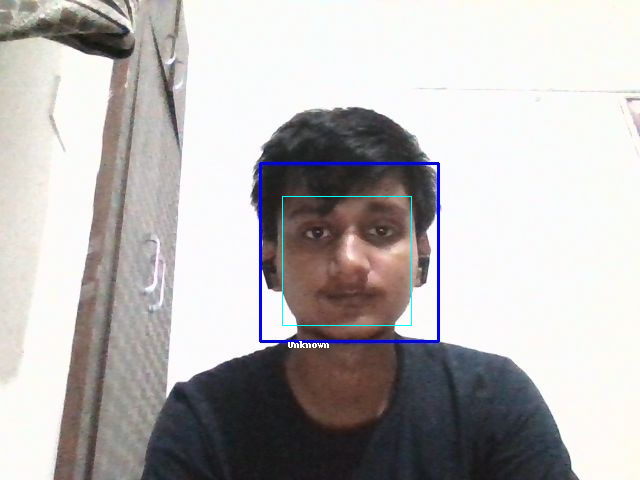

In [ ]:
unknown_image = face_recognition.load_image_file("image.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height + 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [ ]:
%pylab inline
import cv2
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

video_capture = cv2.VideoCapture("Test.mp4")
ret, frame = video_capture.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
frame_count = 0

while video_capture.isOpened():
    ret, frame = video_capture.read()

    if not ret:
        video_capture.release()
        break

    frame_count += 1
    if frame_count % 5 == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        title("Input Stream")
        # plt.imshow(frame)

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        for (face_location,face_encoding) in zip(face_locations,face_encodings):
          matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

          name = "Unknown"

          face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
          best_match_index = np.argmin(face_distances)
          if matches[best_match_index]:
            name = known_face_names[best_match_index]
          # print(name)
          color = (2,2,2)
          start_point = (face_location[3],face_location[0])
          end_point = (face_location[1],face_location[2])
          frame = cv2.rectangle(frame, start_point, end_point, color, 2)
          frame = cv2.putText(frame,name,(face_location[3]-0, face_location[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
          frame_copy = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
          out.write(frame_copy)
          plt.imshow(frame)



        # Show frame...
        plt.show()
        # ... and hold it until a new frame appears
        clear_output(wait=True)
out.release()